# Ventilated Thermocline HWK2

Write a script to plot the solution of the ventilated thermocline problem (h$_1$ and h$_2$) as a function of the wind stress and other parameters (H$_e$, y$_2$, etc.).

Make several different plots which explore the parameter space. (You do not have to plot any solution in the pool or shadow zone regions.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### $ Do^2 = - \frac{2 f^2}{\beta g'_2} \int_x^{x_e} w_E(x',y) dx'$

> which by construction vanishes at the eastern wall (x = xe)

## $ h = \sqrt {\frac{(D_o^2 + H_e^2)}{1 + \gamma (1 - \frac{f}{f2})^2}} $

> $ h = h_1 + h_2$

> $ h_1 = (1 - \frac{f}{f2})h $

> $ h_2 = h \frac{f}{f2}$

### Write a script to plot the solution of the ventilated thermocline problem, h$_1$ & h$_2$
> I will be using Vallis' parameters (16.4.2)

In [2]:
x, y = np.mgrid[0:1.01:.01, 0:1.01:.01]

In [3]:
def h_contours(He = .5, y2 = .8):
    g1 = 1 # reduced gravity in layer 1
    g2 = 1 # reduced gravity in layer 2
    γ = g2 / g1
    β = 1
    f0 = 0.5
    f = f0 + β*y
    f2 = f0 + β*y2 # coriolis parameter as a function of y2
    wE = - np.sin(np.pi*y)
    
    # Do2 is Do-squared
    Do2 = - ( 2*f**2 / β*g2 )*(1-x)*(wE)
    
    top = Do2 + He**2
    bot = 1 + γ*( 1 - (f/f2))**2
    h = np.sqrt(top/bot)
    
    h1 = (1 - f/f2)*h
    h2 = f*h / f2
    
    return h, h1, h2;

In [4]:
y2 = .8
He = .5
h, h1, h2 = h_contours( He=He , y2=y2)

Text(0.0, 1.0, 'Contours of h')

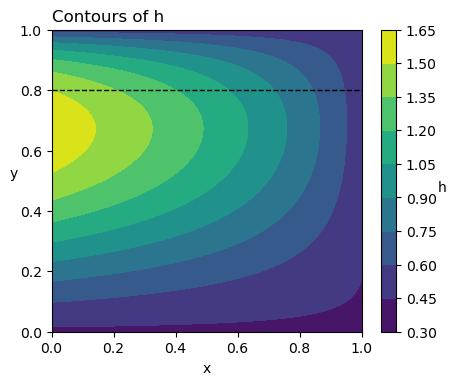

In [5]:
fig, axes = plt.subplots(figsize=(5,4), dpi=100)

g = axes.contourf(x,y,h, cmap=plt.cm.viridis)
# g_lines = axes.contour(x,y,h, colors='k',linewidths=.5)
# axes.clabel(g_lines,inline=1, fontsize=10,rotation=0)

cbar = fig.colorbar(g)
cbar.ax.set_ylabel('h', rotation=0)
# cbar.add_lines(g_lines)

axes.axhline(y2,linestyle='--',color='k',lw=1)

axes.set_ylabel('y', rotation=0)
axes.set_xlim([0,1])
axes.set_ylim([0,1.])
axes.set_xlabel('x')
axes.set_title('Contours of h',loc='left')

Text(0.0, 1.0, 'Contours of h2')

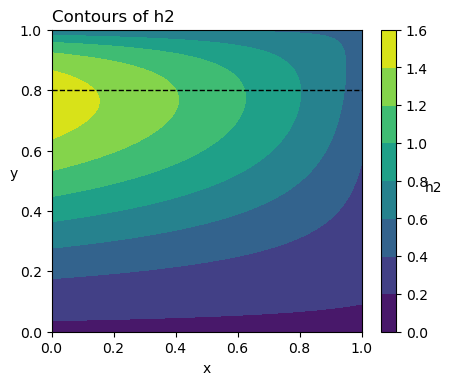

In [6]:
fig, axes = plt.subplots(figsize=(5,4), dpi=100)

g = axes.contourf(x,y,h2, cmap=plt.cm.viridis)
# g_lines = axes.contour(x,y,h, colors='k',linewidths=.5)
# axes.clabel(g_lines,inline=1, fontsize=10,rotation=0)

cbar = fig.colorbar(g)
cbar.ax.set_ylabel('h2', rotation=0)
# cbar.add_lines(g_lines)

axes.axhline(y2,linestyle='--',color='k',lw=1)

axes.set_ylabel('y', rotation=0)
axes.set_xlim([0,1])
axes.set_ylim([0,1.])
axes.set_xlabel('x')
axes.set_title('Contours of h2',loc='left')

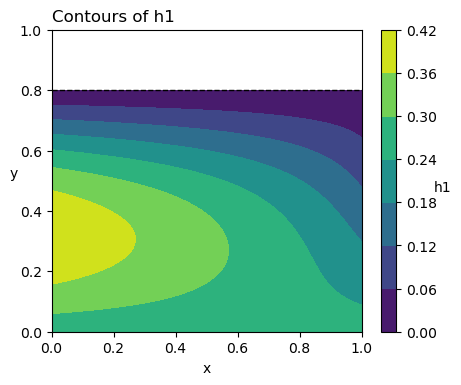

In [7]:
fig, axes = plt.subplots(figsize=(5,4), dpi=100)

h1[h1 < 0 ] = np.nan

g = axes.contourf(x,y,h1, cmap=plt.cm.viridis)
# g_lines = axes.contour(x,y,h, colors='k',linewidths=.5)
# axes.clabel(g_lines,inline=1, fontsize=10,rotation=0)

cbar = fig.colorbar(g)
cbar.ax.set_ylabel('h1', rotation=0)
# cbar.add_lines(g_lines)

axes.axhline(y2,linestyle='--',color='k',lw=1)

axes.set_ylabel('y', rotation=0)
axes.set_xlim([0,1])
axes.set_ylim([0,1.])
axes.set_xlabel('x')
axes.set_title('Contours of h1',loc='left');

In [10]:
import scipy
from scipy import interpolate

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


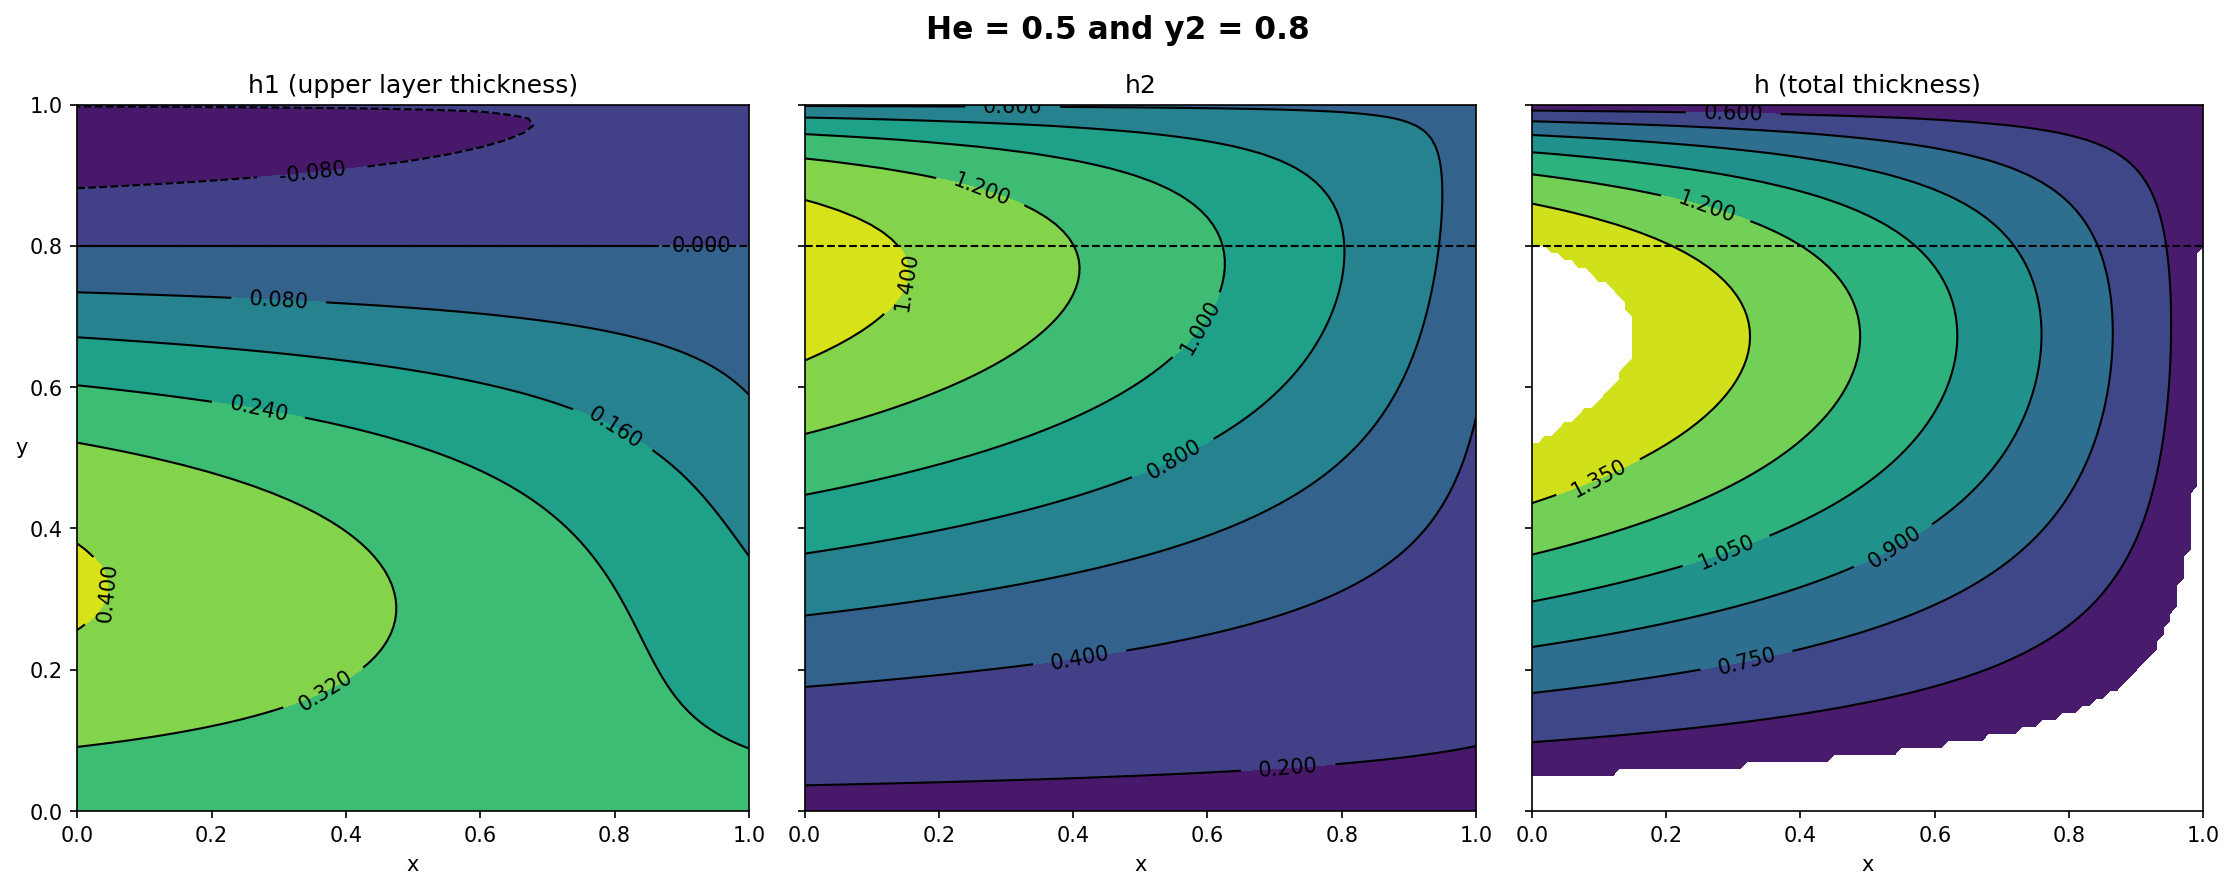

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6),sharey=True,dpi=150)

He = 0.5
y2 = .8
h, h1, h2 = h_contours( He=He , y2=y2 )

# shadow zone
f = scipy.interpolate.interp2d(x,y,h)
z_shadow = f(1,y2)
h[(h <= z_shadow) & (y < y2)] = np.nan

# pool zone
z_pool = f(0,y2)
h[(h > z_pool) & (y < y2)] = np.nan

# EASIER to read without colors
g1 = axes[0].contourf(x,y,h1, cmap=plt.cm.viridis)
g2 = axes[1].contourf(x,y,h2, cmap=plt.cm.viridis)
g = axes[2].contourf(x,y,h, cmap=plt.cm.viridis)

for i in range(0,3):
    axes[i].axhline(y2,linestyle='--',color='k',lw=1)
    axes[i].set_xlabel('x')
    
axes[0].set_ylabel('y',rotation=0)
axes[0].set_title('h1 (upper layer thickness)')
axes[1].set_title('h2')
axes[2].set_title('h (total thickness)')

g1_lines = axes[0].contour(x,y,h1, colors='k',linewidths=1)
g2_lines = axes[1].contour(x,y,h2, colors='k',linewidths=1)
g_lines = axes[2].contour(x,y,h, colors='k',linewidths=1)
axes[0].clabel(g1_lines,inline=1, fontsize=10)
axes[1].clabel(g2_lines,inline=1, fontsize=10)
axes[2].clabel(g_lines,inline=1, fontsize=10)

fig.suptitle('He = 0.5 and y2 = 0.8',size=15,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88)

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


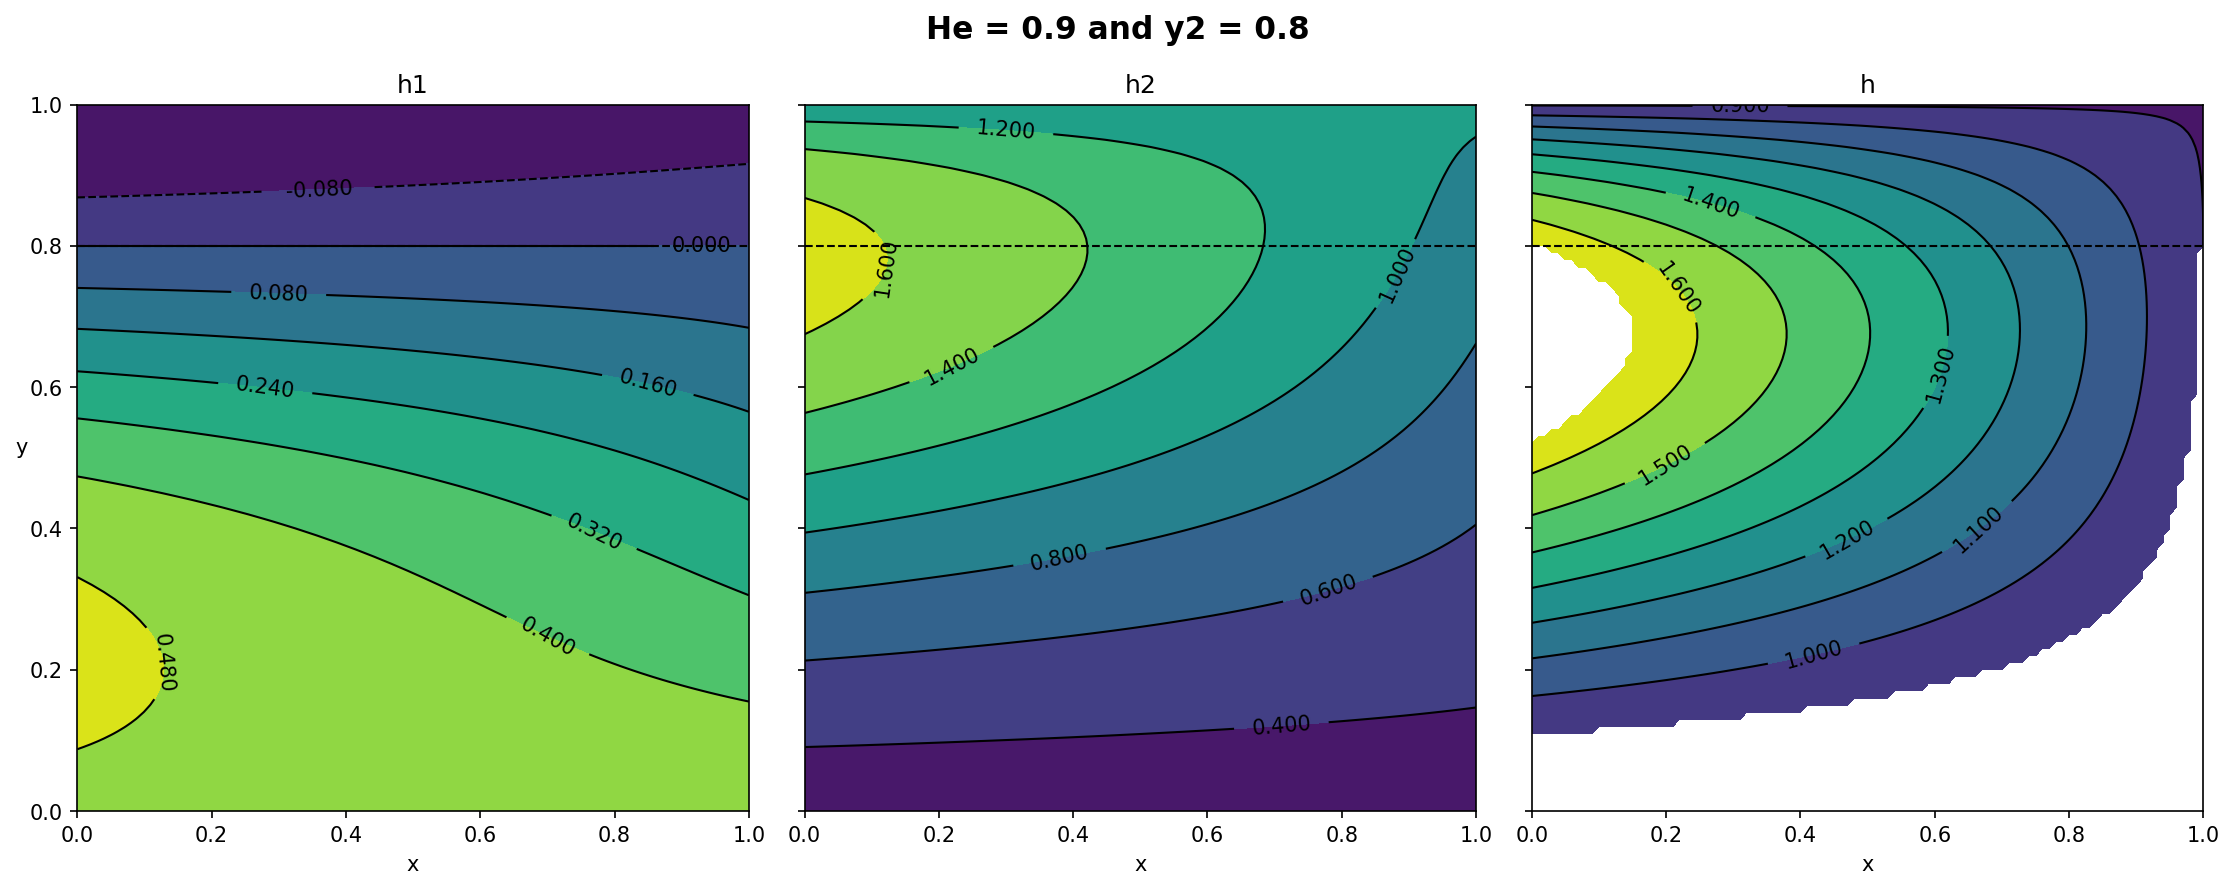

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6),sharey=True,dpi=150)

He = .9
y2 = .8
h, h1, h2 = h_contours( He=He , y2=y2 )

# shadow zone
f = scipy.interpolate.interp2d(x,y,h)
z_shadow = f(1,y2)
h[(h <= z_shadow) & (y < y2)] = np.nan

# pool zone
z_pool = f(0,y2)
h[(h > z_pool) & (y < y2)] = np.nan

g1 = axes[0].contourf(x,y,h1, cmap=plt.cm.viridis)
g2 = axes[1].contourf(x,y,h2, cmap=plt.cm.viridis)
g = axes[2].contourf(x,y,h, cmap=plt.cm.viridis)

for i in range(0,3):
    axes[i].axhline(y2,linestyle='--',color='k',lw=1)
    axes[i].set_xlabel('x')
    
axes[0].set_ylabel('y',rotation=0)
axes[0].set_title('h1')
axes[1].set_title('h2')
axes[2].set_title('h')


g1_lines = axes[0].contour(x,y,h1, colors='k',linewidths=1)
g2_lines = axes[1].contour(x,y,h2, colors='k',linewidths=1)
g_lines = axes[2].contour(x,y,h, colors='k',linewidths=1)
axes[0].clabel(g1_lines,inline=1, fontsize=10)
axes[1].clabel(g2_lines,inline=1, fontsize=10)
axes[2].clabel(g_lines,inline=1, fontsize=10)

fig.suptitle('He = '+str(He)+' and y2 = '+str(y2),size=15,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88)


/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


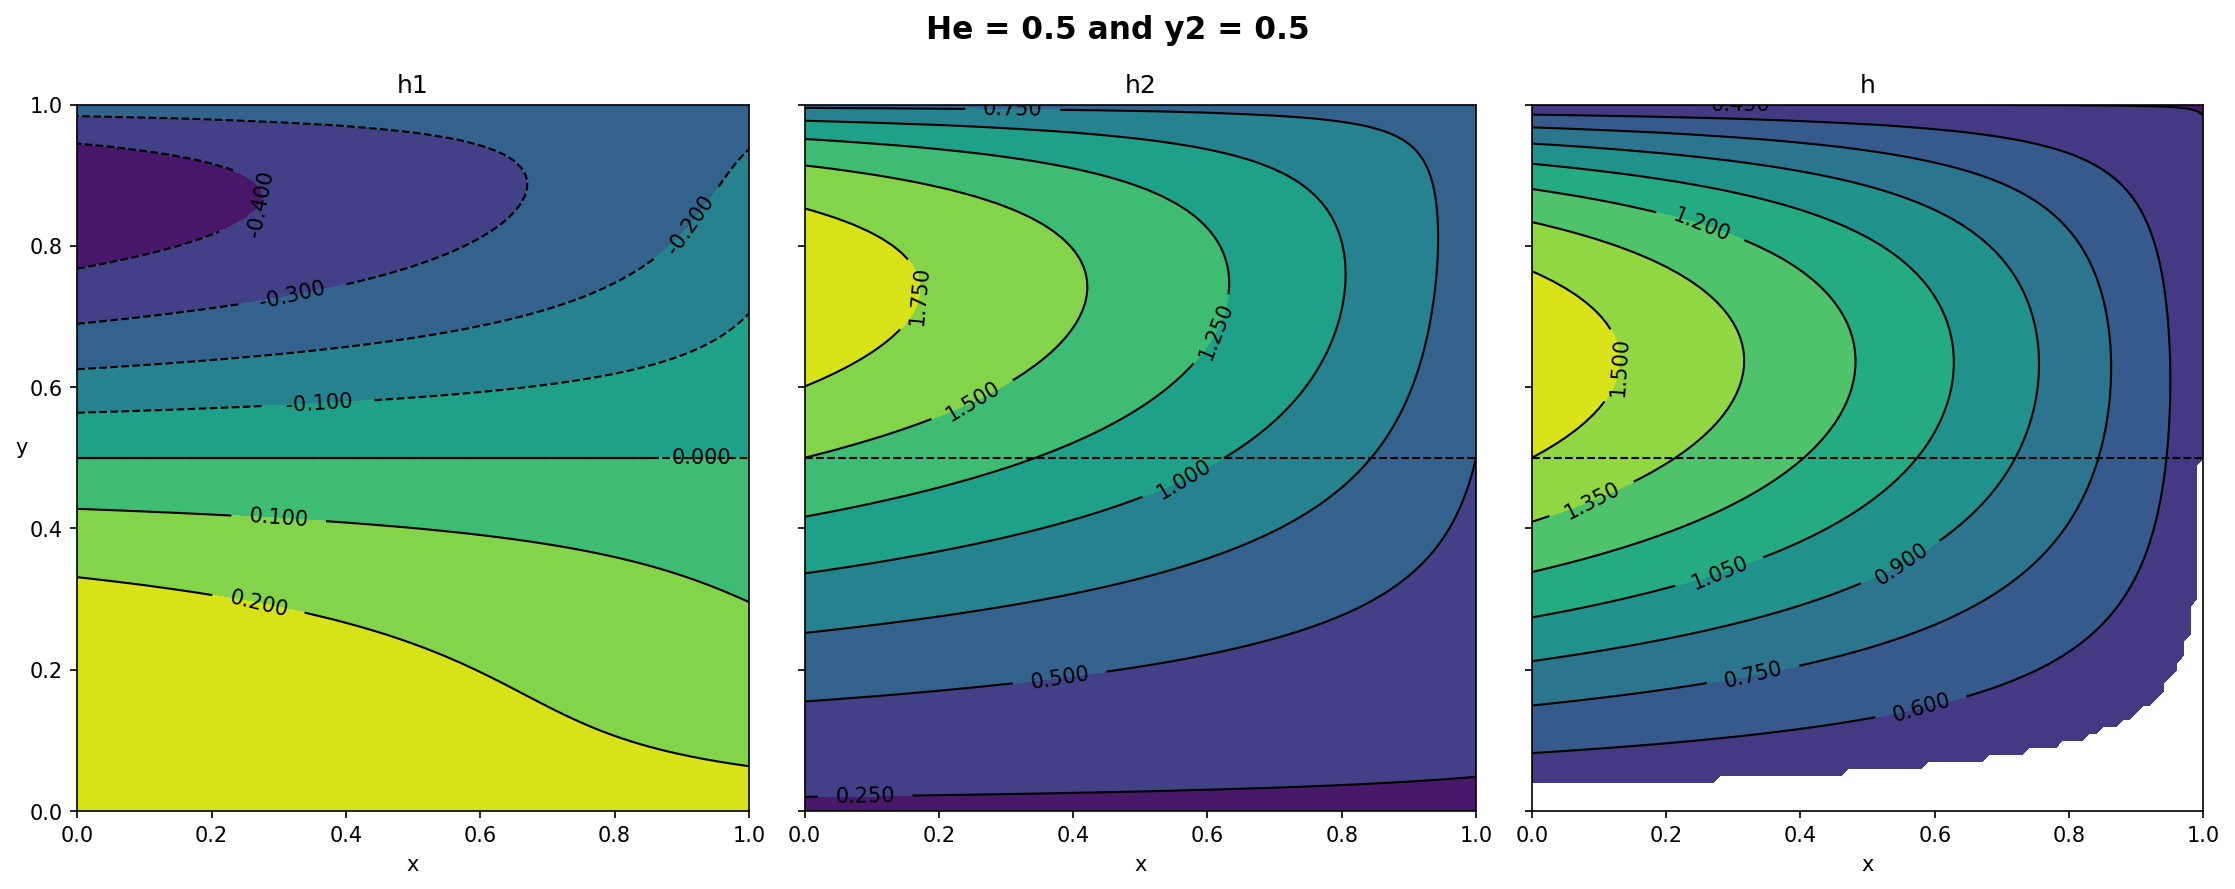

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6),sharey=True,dpi=150)

He = 0.5
y2 = 0.5
h, h1, h2 = h_contours( He=He , y2=y2 )

# shadow zone
f = scipy.interpolate.interp2d(x,y,h)
z_shadow = f(1,y2)
h[(h <= z_shadow) & (y < y2)] = np.nan

# pool zone
z_pool = f(0,y2)
h[(h > z_pool) & (y < y2)] = np.nan

g1 = axes[0].contourf(x,y,h1, cmap=plt.cm.viridis)
g2 = axes[1].contourf(x,y,h2, cmap=plt.cm.viridis)
g = axes[2].contourf(x,y,h, cmap=plt.cm.viridis)

for i in range(0,3):
    axes[i].axhline(y2,linestyle='--',color='k',lw=1)
    axes[i].set_xlabel('x')
    
axes[0].set_ylabel('y',rotation=0)
axes[0].set_title('h1')
axes[1].set_title('h2')
axes[2].set_title('h')


g1_lines = axes[0].contour(x,y,h1, colors='k',linewidths=1)
g2_lines = axes[1].contour(x,y,h2, colors='k',linewidths=1)
g_lines = axes[2].contour(x,y,h, colors='k',linewidths=1)
axes[0].clabel(g1_lines,inline=1, fontsize=10)
axes[1].clabel(g2_lines,inline=1, fontsize=10)
axes[2].clabel(g_lines,inline=1, fontsize=10)

fig.suptitle('He = '+str(He)+' and y2 = '+str(y2),size=15,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88)


/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


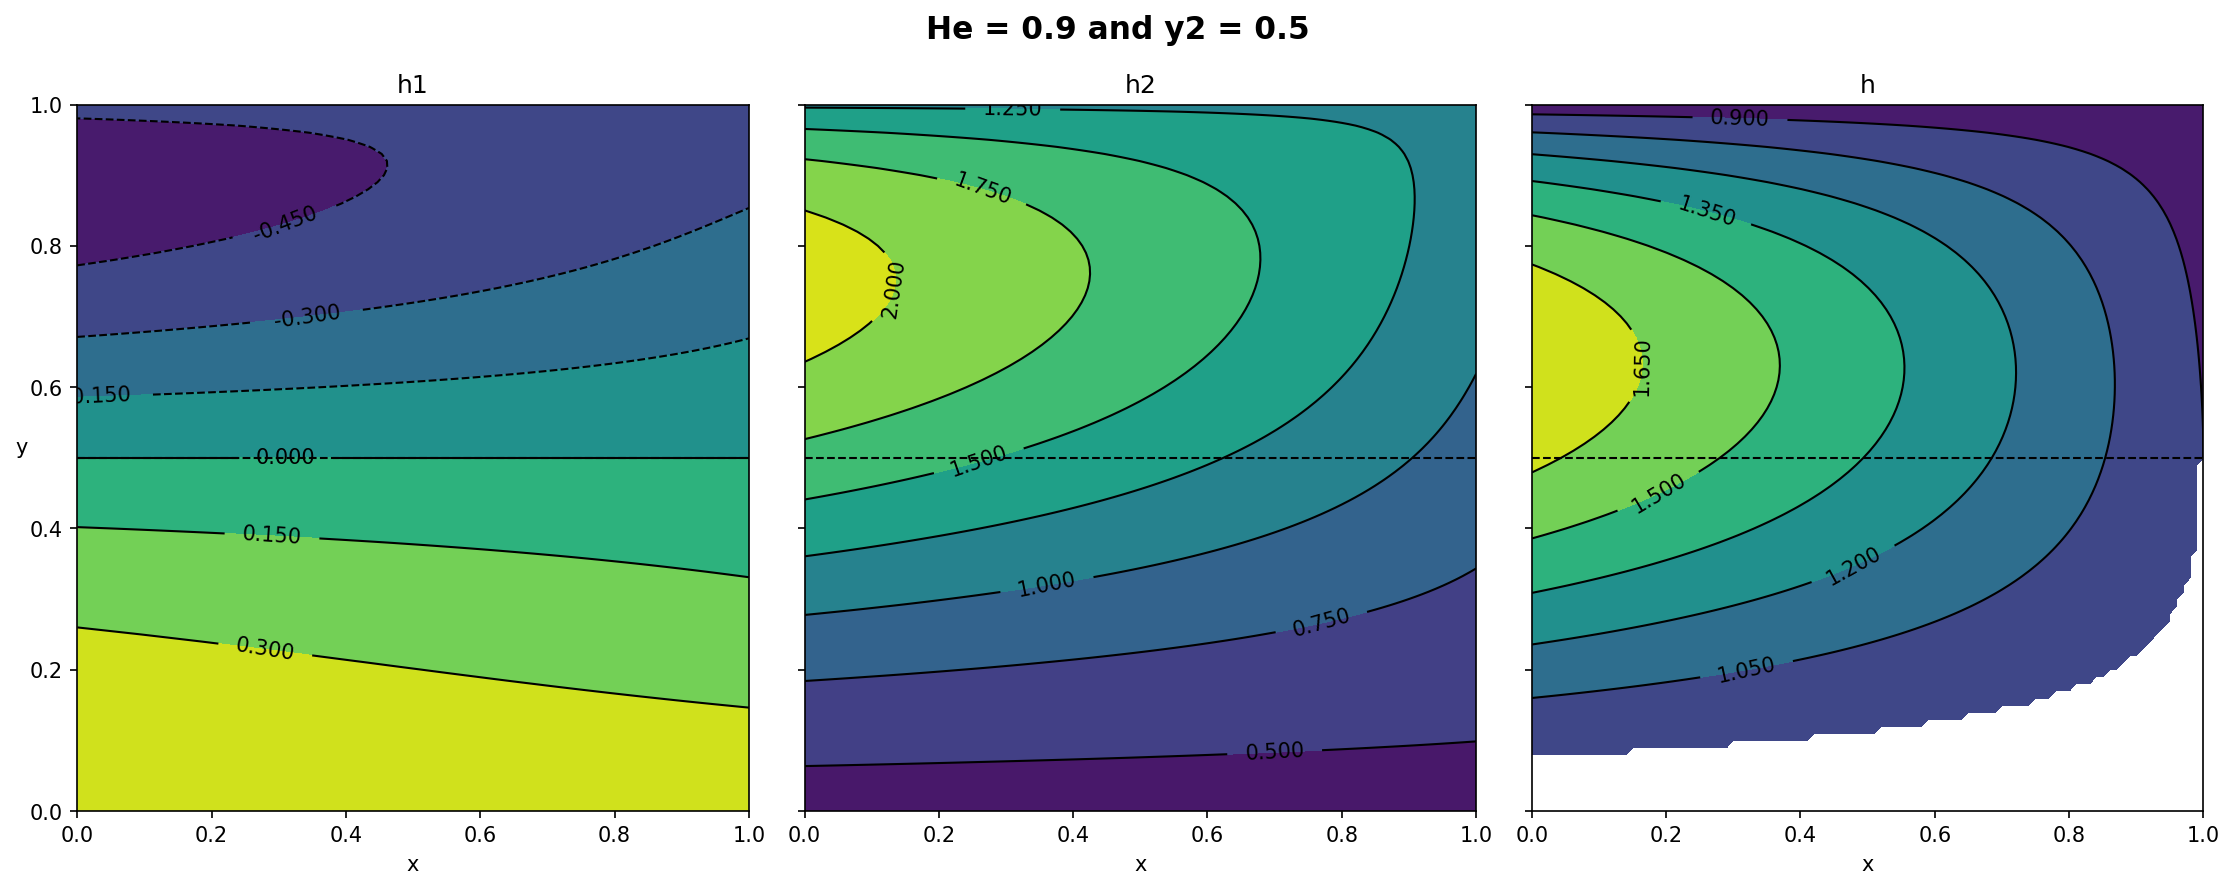

In [15]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6),sharey=True,dpi=150)

He = 0.9
y2 = .5
h, h1, h2 = h_contours( He=He , y2=y2 )

# shadow zone
f = scipy.interpolate.interp2d(x,y,h)
z_shadow = f(1,y2)
h[(h <= z_shadow) & (y < y2)] = np.nan

# pool zone
z_pool = f(0,y2)
h[(h > z_pool) & (y < y2)] = np.nan

g1 = axes[0].contourf(x,y,h1, cmap=plt.cm.viridis)
g2 = axes[1].contourf(x,y,h2, cmap=plt.cm.viridis)
g = axes[2].contourf(x,y,h, cmap=plt.cm.viridis)

for i in range(0,3):
    axes[i].axhline(y2,linestyle='--',color='k',lw=1)
    axes[i].set_xlabel('x')
    
axes[0].set_ylabel('y',rotation=0)
axes[0].set_title('h1')
axes[1].set_title('h2')
axes[2].set_title('h')


g1_lines = axes[0].contour(x,y,h1, colors='k',linewidths=1)
g2_lines = axes[1].contour(x,y,h2, colors='k',linewidths=1)
g_lines = axes[2].contour(x,y,h, colors='k',linewidths=1)
axes[0].clabel(g1_lines,inline=1, fontsize=10)
axes[1].clabel(g2_lines,inline=1, fontsize=10)
axes[2].clabel(g_lines,inline=1, fontsize=10)

fig.suptitle('He = '+str(He)+' and y2 = '+str(y2),size=15,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
 

### Instead of Vallis' parameters, I will use real-word values, with wind stress from MITgcm

In [1]:
import xarray as xr
import hvplot.xarray
import xmitgcm
import xgcm

In [4]:
rundir ='/rigel/ocp/users/scw2148/tutorial_barotropic_gyre/run'

# there are 72 20-minute timesteps in 24 hours, for the 200 days of the run
# start at 1, since we don't want to read the very first one to avoid glitches
timesteps = 72*np.arange(1,201)

# 360_day calendar doesn't include leap years and every month is 30 days
ds = xmitgcm.open_mdsdataset(rundir, iters=timesteps,
                             delta_t=1200, calendar='360_day',
                             ref_date='0000-01-01 00:00:00')
ds;

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

In [5]:
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds, metrics=metrics, periodic = False)
grid

<xgcm.Grid>
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center
X Axis (not periodic):
  * center   XC --> left
  * left     XG --> center

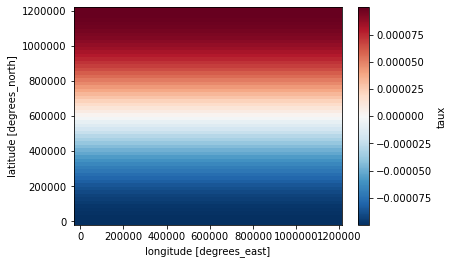

In [6]:
# read zonal wind stress data
dtype = '>f4'
taux_data = np.fromfile(f'{rundir}/windx_cosy.bin', dtype=dtype)
taux_data.shape = ds.rA.shape
rho0 = 1000.
ds['taux'] = ('YC', 'XG'), taux_data / rho0
ds.taux.plot()

### $ Do^2 = - \frac{2 f^2}{\beta g'_2} \int_x^{x_e} w_E(x',y) dx'$

> which by construction vanishes at the eastern wall (x = xe)

In [7]:
π = np.pi
β = 1e-11 # m-1 s-1
# a is the size of the domain, so a = ds.XG[-1]
a = float(ds.dxC.isel(YC=0,XG=slice(1,-1)).sum(dim='XG'))
x = ds.XG
y = ds.YG
ϵ = 0.04
τ0 = 0.1/1e3 # N m-2 standard wind stress

f0 = 1e-4 # s-1
g1 = 1
g2 = 1
γ = g2 / g1
f = f0 + β*y

# outcropping latitude is at y2
y2 = 8e5
f2 = f0 + β*y2

In [8]:
curl_tau = - grid.diff(ds.taux * ds.dxC, 'Y', boundary='extend') / ds.rAz

In [9]:
ds['curl_tau'] = ('YG','XG'), curl_tau

In [10]:
integral = ((ds.curl_tau/f0).sum(dim='XG') * a) - ((ds.curl_tau/f0).cumsum(dim='XG') * a)

In [11]:
Do2 = - (2*f**2 / β*g2)* integral

In [12]:
He = 150
top = Do2 + He**2
bot = 1 + γ*( 1 - (f/f2))**2
h = np.sqrt(top/bot)

h1 = (1 - f/f2)*h
h2 = f*h / f2

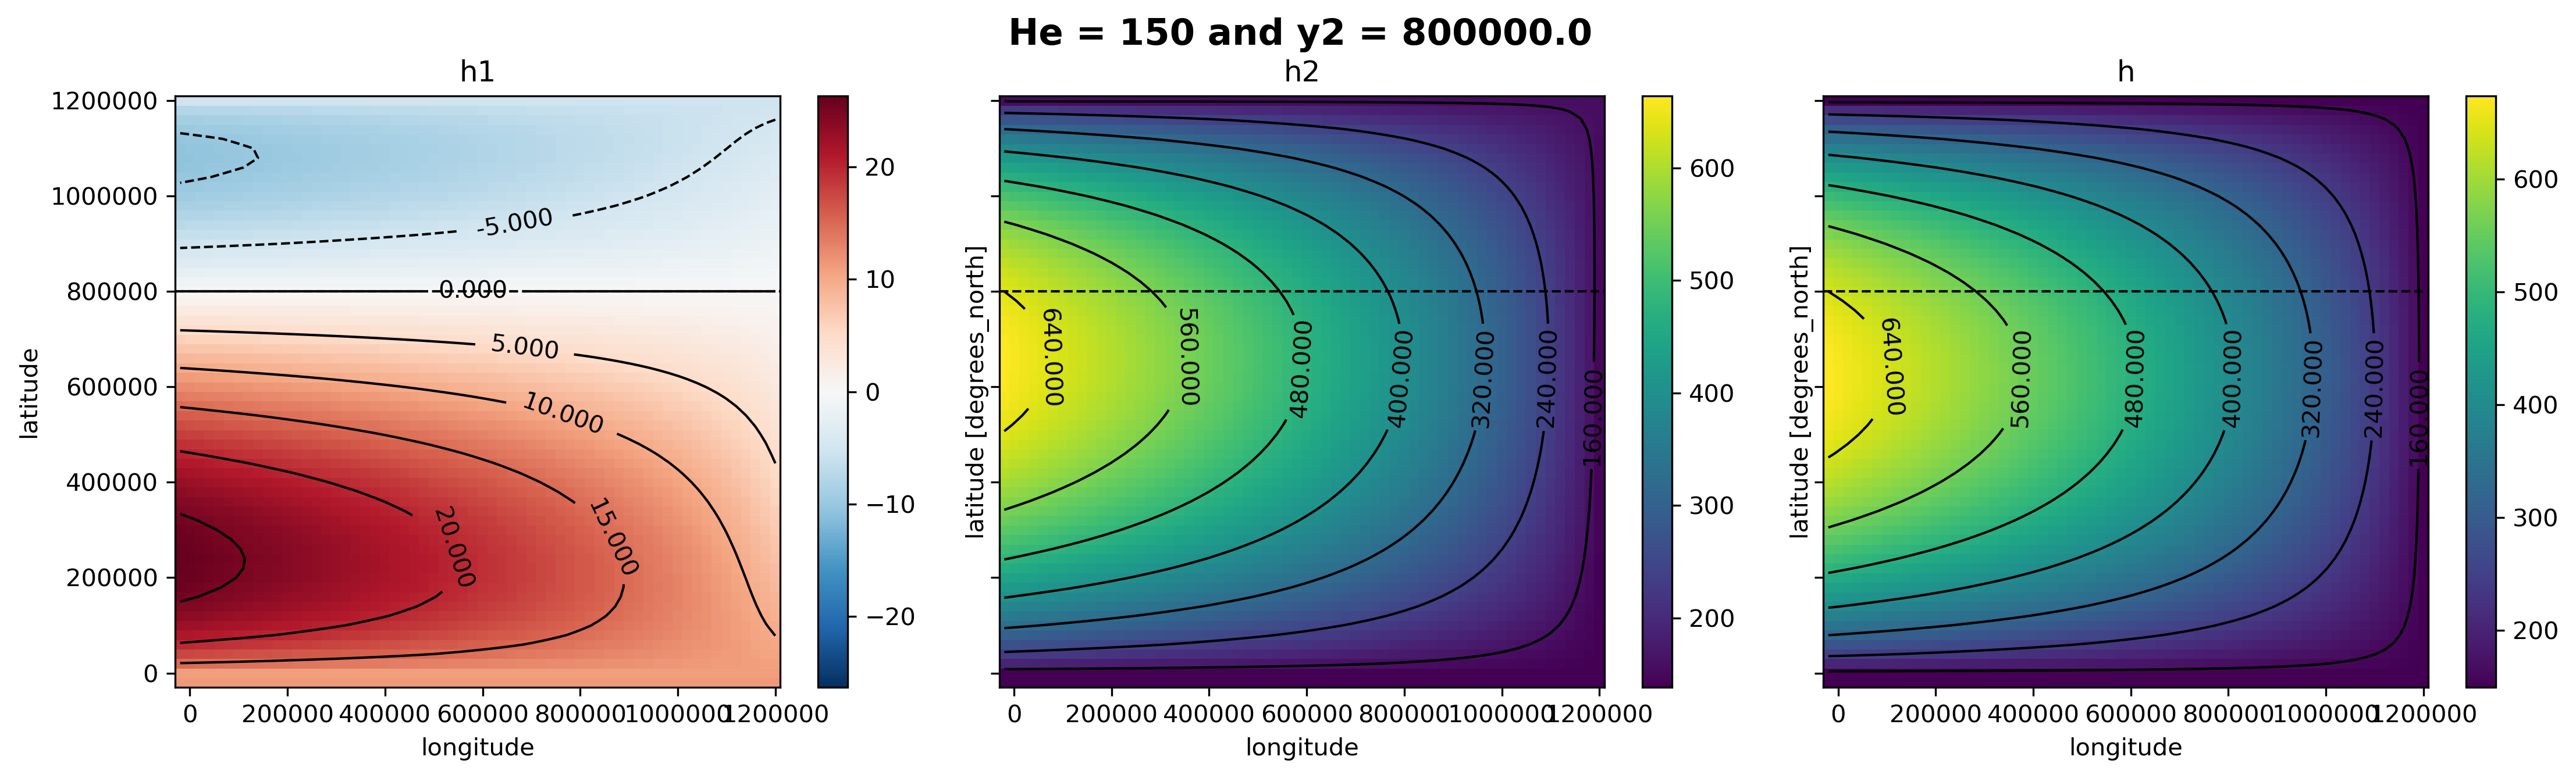

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,4.5),sharey=True,dpi=300)

h1.plot(ax=axes[0])
h2.plot(ax=axes[1])
h.plot(ax=axes[2])

for i in range(0,3):
    axes[i].axhline(y2,linestyle='--',color='k',lw=1)
    axes[i].set_xlabel('longitude')
    
axes[0].set_ylabel('latitude')
axes[0].set_title('h1')
axes[1].set_title('h2')
axes[2].set_title('h')


g1_lines = axes[0].contour(x,y,h1, colors='k',linewidths=1)
g2_lines = axes[1].contour(x,y,h2, colors='k',linewidths=1)
g_lines = axes[2].contour(x,y,h, colors='k',linewidths=1)
axes[0].clabel(g1_lines,inline=1, fontsize=10)
axes[1].clabel(g2_lines,inline=1, fontsize=10)
axes[2].clabel(g_lines,inline=1, fontsize=10)

fig.suptitle('He = '+str(He)+' and y2 = '+str(y2),size=15,fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88)
